<a href="https://colab.research.google.com/github/hhdjwdabsxsx/Calories-Burned-Prediction/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  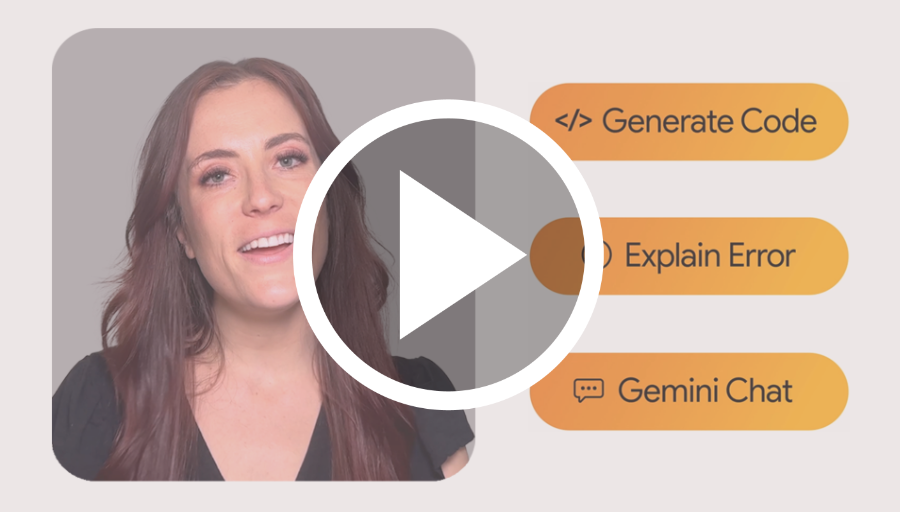
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [2]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from  sklearn.preprocesing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge, Lasso
from  sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

sns.set()

In [3]:
# Load the Calories dataset
df1 = pd.read_csv('calories.csv')
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
df1.shape

(15000, 2)

In [6]:
#Load the Exercise dataset
df2 = pd.read_csv('exercise.csv')
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
df2.shape

(15000, 8)

In [8]:
# Concatenate both the DataGrame i.e. df1 and df2
df = pd.concat([df1, df2], axis=1)
df.head()

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   User_ID     15000 non-null  int64  
 3   Gender      15000 non-null  object 
 4   Age         15000 non-null  int64  
 5   Height      15000 non-null  float64
 6   Weight      15000 non-null  float64
 7   Duration    15000 non-null  float64
 8   Heart_Rate  15000 non-null  float64
 9   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.1+ MB


In [10]:
df.describe()

,User_ID,Calories,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [11]:
df.isnull().sum()

,0
User_ID,0
Calories,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [12]:
# drop User_ID column because this is not required from Main Dataframe itself
df.drop(columns = ["User_ID"], axis = 1, inplace = True)

In [13]:
df.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


Separate Categorical and Numerical Features


1. Categorical Feature


In [15]:
# Fetching Categorical Data
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['Gender']

In [16]:
df["Gender"].value_counts()

,count
Gender,
female,7553
male,7447


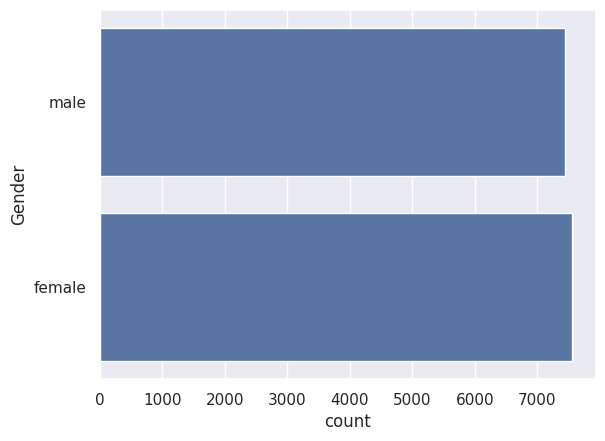

In [18]:
# plotting the gender column in count plot
sns.countplot(df['Gender'])
plt.show()


In [20]:
pd.get_dummies(df["Gender"], drop_first=True)

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [21]:
categorical = df[cat_col]
categorical.head()

,Gender
0,male
1,female
2,male
3,female
4,female


In [22]:
categorical = pd.get_dummies(categorical["Gender"], drop_first = True)

In [23]:
categorical

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


2. Numerical Features


In [24]:
Num_col = [col for col in df.columns if df[col].dtype != "0"]
Num_col

['Calories',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp']

In [25]:
df[Num_col].shape

(15000, 8)

In [26]:
Numerical = df[Num_col]
Numerical.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [27]:
Numerical.shape

(15000, 8)

Skipping column 'Gender' because it is not numeric.


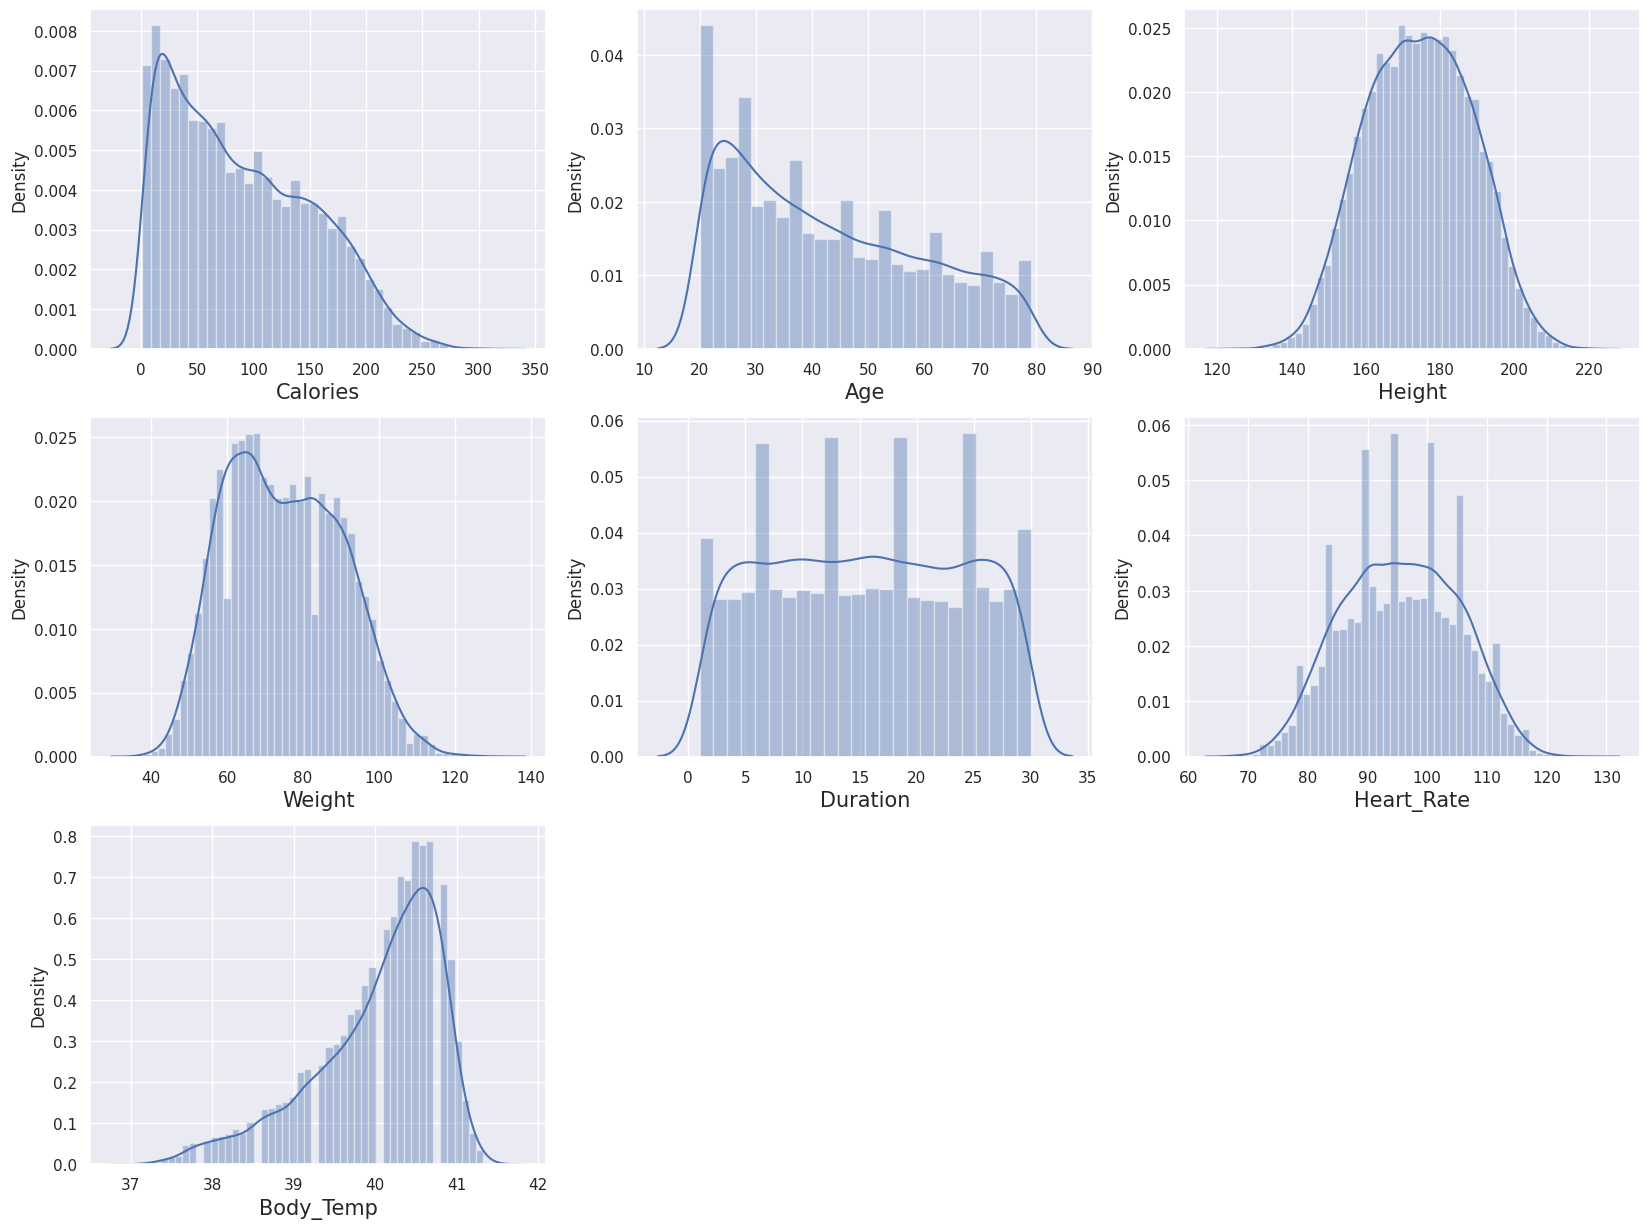

In [30]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in Numerical:
    # Check if the column contains numeric data
    if plotnumber <= 8 and Numerical[column].dtype in [np.int64, np.float64]:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(Numerical[column])
        plt.xlabel(column,fontsize=15)
        plotnumber+=1
    else:
        # Skip non-numeric columns
        print(f"Skipping column '{column}' because it is not numeric.")

plt.show()

<Axes: >

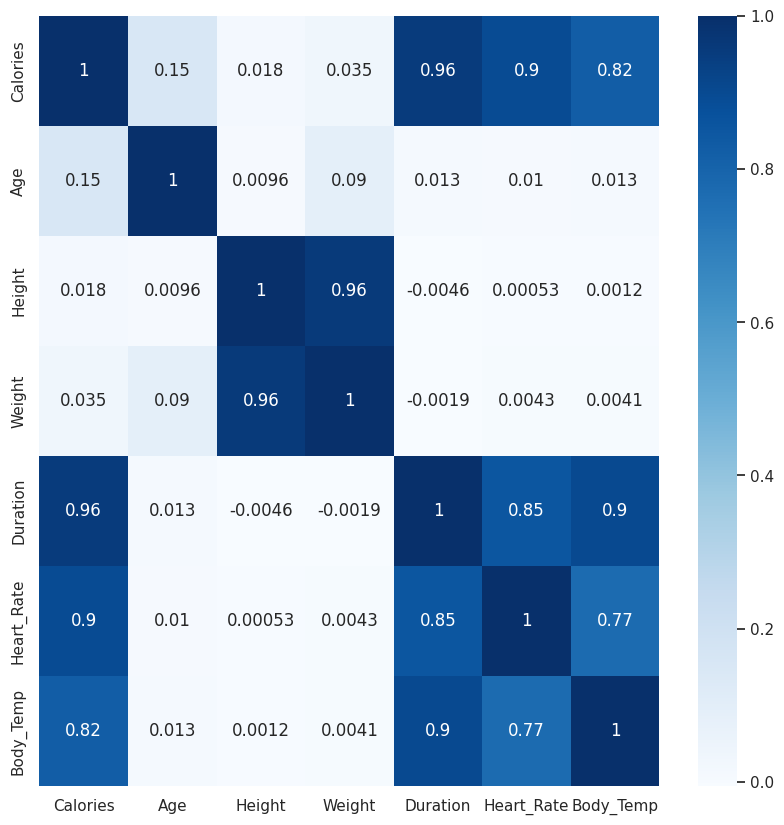

In [32]:
# Assuming 'Gender' is the only non-numeric column in the DataFrame
# we can add more columns to the list if needed

# Selecting only numeric columns for correlation
numeric_columns = Numerical.select_dtypes(include=np.number).columns
numeric_df = Numerical[numeric_columns]

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True)

Concatenate Categorical and Numerical

In [33]:
data = pd.concat([categorical,Numerical], axis=1)

In [34]:
data.head()

,male,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,True,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,False,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,True,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,False,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,False,35.0,female,27,154.0,58.0,10.0,81.0,39.8


<Axes: >

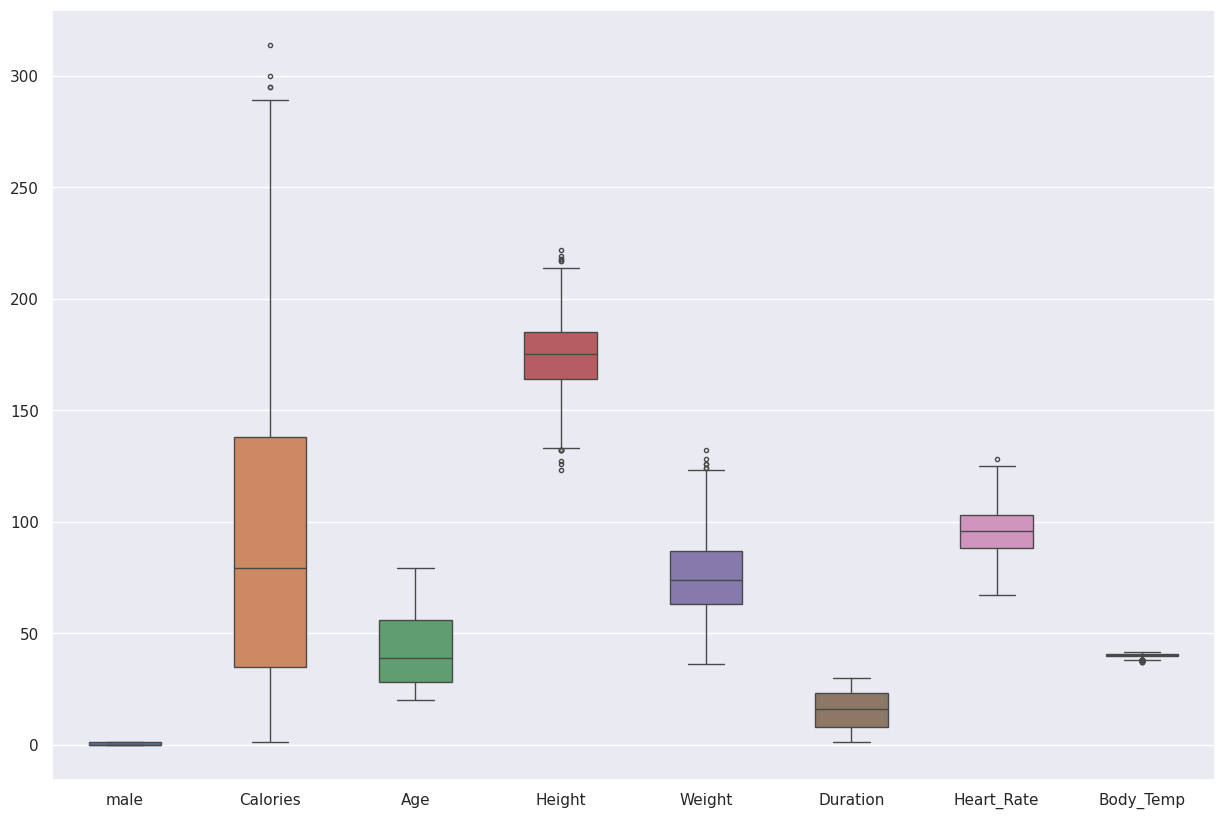

In [35]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data,width = 0.5, fliersize = 3,ax=ax)

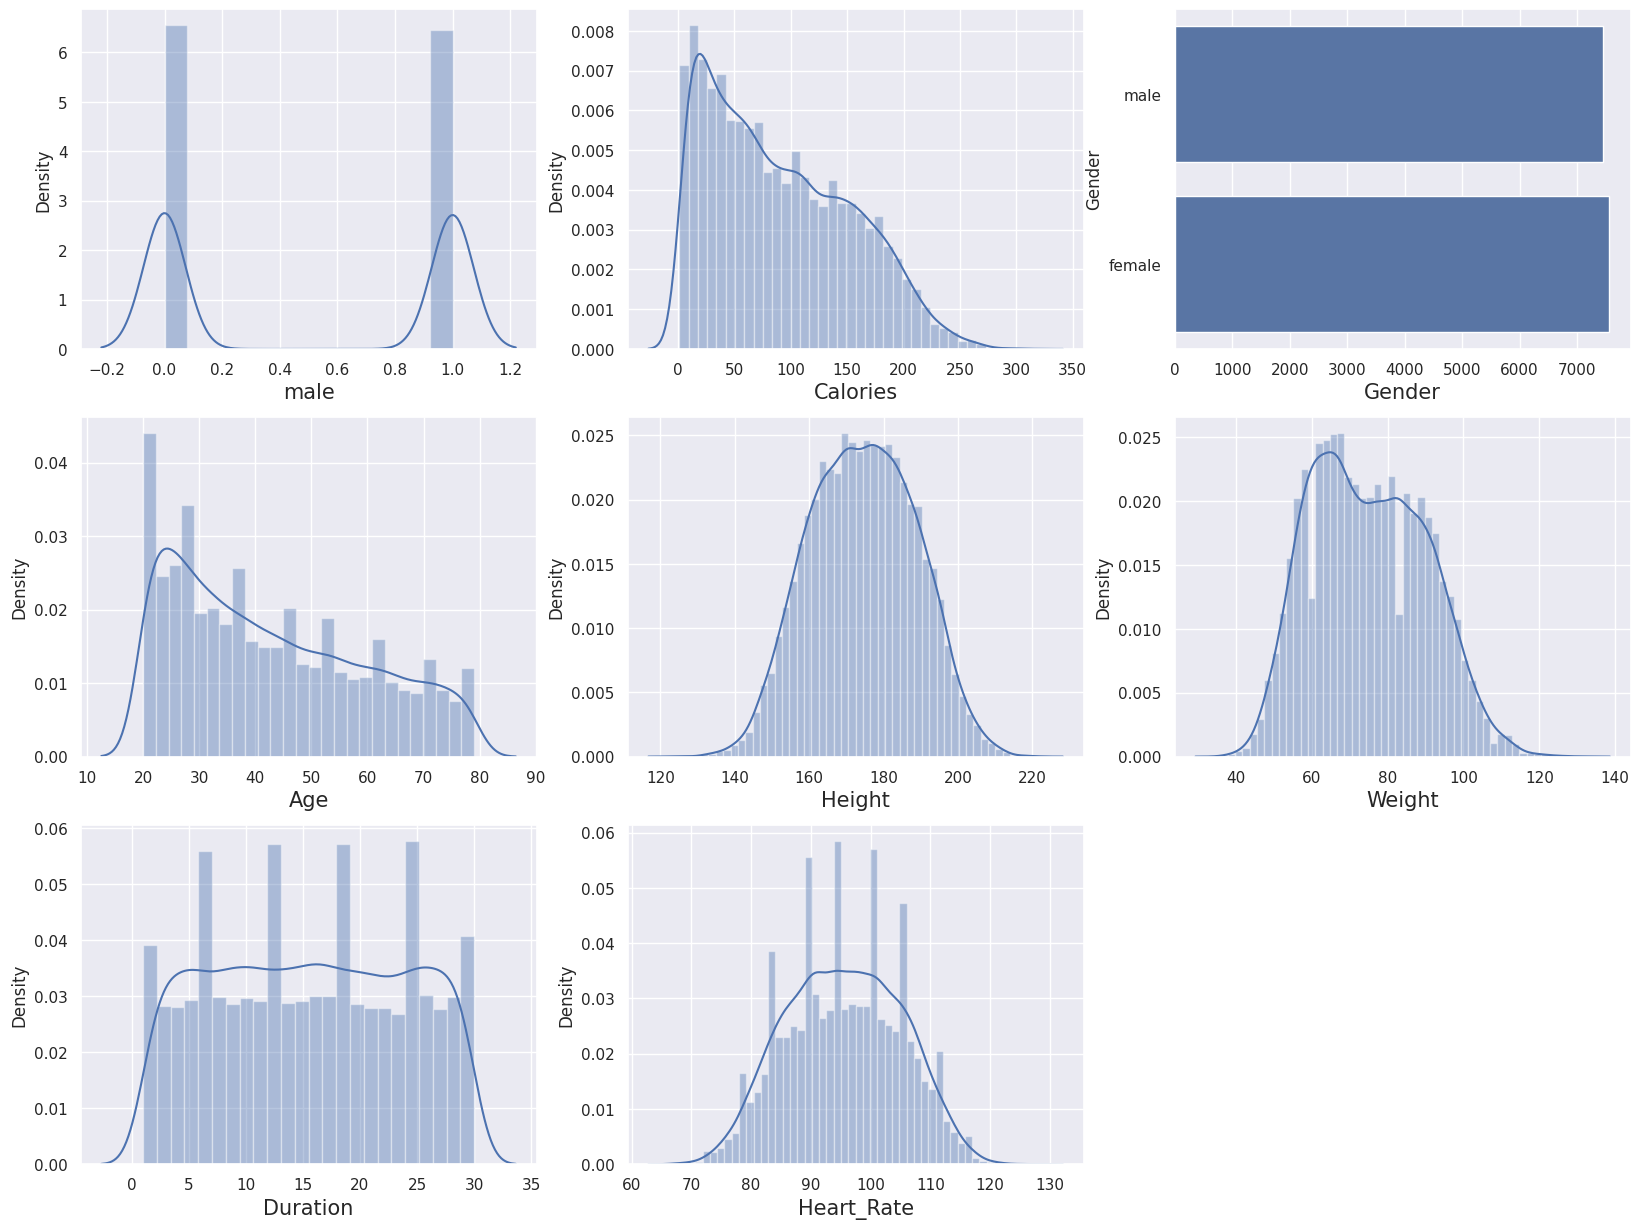

In [37]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in data:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    if data[column].dtype != object: # Check if the column is numerical
      sns.distplot(data[column])
    else:
      sns.countplot(data[column]) # Use countplot for categorical data
    plt.xlabel(column,fontsize = 15)
  plotnumber+=1
plt.show()

In [38]:
data.columns

Index(['male', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [39]:
X = data.drop(columns = ["Calories"], axis = 1)
y = data["Calories"]

In [40]:
X.head()

,male,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,True,male,68,190.0,94.0,29.0,105.0,40.8
1,False,female,20,166.0,60.0,14.0,94.0,40.3
2,True,male,69,179.0,79.0,5.0,88.0,38.7
3,False,female,34,179.0,71.0,13.0,100.0,40.5
4,False,female,27,154.0,58.0,10.0,81.0,39.8


In [41]:
y.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [42]:
# Split the Data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [43]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (12000, 8)
Shape of X Test:  (3000, 8)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [44]:
# from sklearn import metrics
def predict(ml_model):
  model=ml_model.fit(X_train, y_train)
  print('Score : {}'.format(model.score(X_train, y_train)))
  y_prediction=model.predict(X_test)
  print('predictions are: \n {}'.format(y_prediction))
  print('/n')

  r2_score=metrics.r2_score(y_test, y_prediction)
  print('r2 score: {}'.format(r2_score))

  print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
  print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

  sns.distplot(y_test-y_prediction)

In [46]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 8.3 MB/s eta 0:00:00


XGB Regressor


In [52]:
import category_encoders as ce

Score : 0.9995380557081355
predictions are: 
 [197.06581   70.867226 196.99498  ...  29.043041 104.09284   14.61472 ]
/n
r2 score: 0.9986863132331905
MAE: 1.5521575984954834
MSE: 5.2744122853837005
RMSE: 2.2966088664340956


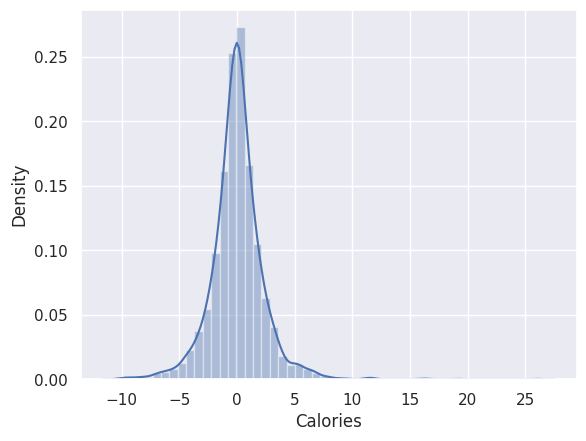

In [53]:
# Assuming X is your DataFrame containing features

# Create an OrdinalEncoder object
encoder = ce.OrdinalEncoder(cols=['Gender']) # Replace 'Gender' with your actual column name

# Fit the encoder on your training data and transform both training and testing data
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


def predict(ml_model):
  model=ml_model.fit(X_train, y_train)
  print('Score : {}'.format(model.score(X_train, y_train)))
  y_prediction=model.predict(X_test)
  print('predictions are: \n {}'.format(y_prediction))
  print('/n')

  r2_score=metrics.r2_score(y_test, y_prediction)
  print('r2 score: {}'.format(r2_score))

  print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
  print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

  sns.distplot(y_test-y_prediction)

regression = predict(XGBRegressor())
regression

Score : 1.0
predictions are: 
 [194.  75. 206. ...  30. 109.  13.]
/n
r2 score: 0.9923875718710038
MAE: 3.4896666666666665
MSE: 30.563666666666666
RMSE: 5.528441612847753


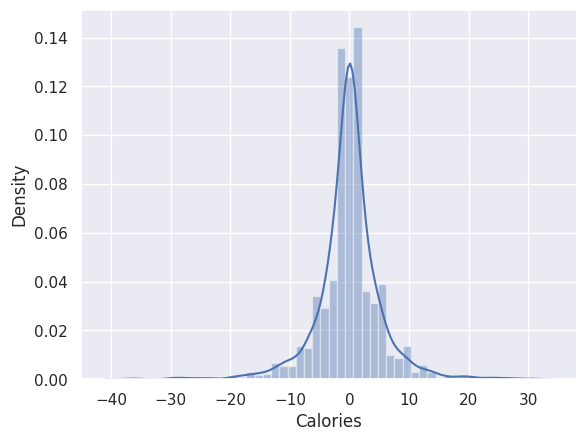

In [54]:
predict(DecisionTreeRegressor())

RandomForest Regression

Score : 0.9996784405078621
predictions are: 
 [197.39  65.9  196.89 ...  27.62 111.58  14.17]
/n
r2 score: 0.9976679487864327
MAE: 1.8182133333333337
MSE: 9.363114466666666
RMSE: 3.0599206634595393


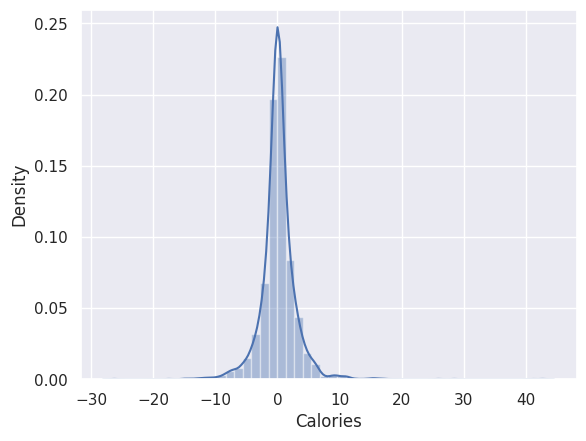

In [55]:
predict(RandomForestRegressor())